MNIST classification
====================

Simple classification of MNIST digits.

## Import packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, BatchNormalization, UpSampling2D, Conv2D, LeakyReLU, Flatten, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import os
from random import shuffle, randint

## Check wether we use GPU or not

In [2]:
# print version and make sure we're using GPU
print("Tensorflow version", tf.__version__)
if tf.test.is_gpu_available():
    print("Congratulations, you're running on GPU!")
else:
    print("We couldn't find your GPU")

Tensorflow version 2.0.0-alpha0
We couldn't find your GPU


## Load dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


Let's show some numbers to see what we can find in the dataset.

Text(0.5, 1.0, 'This is a 0')

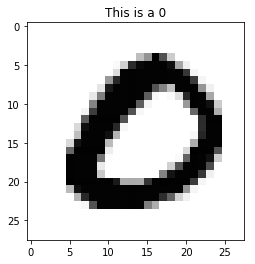

In [5]:
image_number = randint(0, y_train.shape[0] - 1)
plt.imshow(x_train[image_number,:,:], cmap="Greys")
plt.title("This is a {}".format(y_train[image_number]))

## Define the network

In [18]:
def build_mnist_classifier(input_shape=(28, 28)):
    img = Input(shape=input_shape, dtype="float32")
    input_shape_with_channels = (*input_shape, 1)
    x = Reshape(input_shape_with_channels)(img)
#     x = tf.expand_dims(img, len(img.shape))
    print(x.shape)
    
    # conv layers
    x = Conv2D(16, (3, 3), padding="valid", activation="relu")(x)
    x = Conv2D(32, (3, 3), padding="valid", activation="relu")(x)
    x = Conv2D(32, (3, 3), padding="valid", activation="relu")(x)
    x = Conv2D(32, (3, 3), padding="valid", activation="relu")(x)
    x = Conv2D(32, (3, 3), padding="valid", activation="relu")(x)
    
    # dense layers
    x = Flatten()(x)
    x = Dense(128)(x)
    x = Dense(64)(x)
    x = Dense(32)(x)
    x = Dense(10)(x)
    out = Softmax()(x)
    
    # build model
    model = Model(inputs=[img], outputs=[out])
    
    return model

build_mnist_classifier().summary()

(None, 28, 28, 1)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 1

In [8]:
def compile_model(model):
    optimizer = Adam()
    
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [9]:
model = build_mnist_classifier()
model = compile_model(model)

(None, 28, 28, 1)


In [10]:
model.fit(x_train, y_train, epochs=1)

60000/60000 [==============================] - 65s 1ms/sample - loss: 0.1209 - accuracy: 0.9636


In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 240us/sample - loss: 0.0690 - accuracy: 0.9770


[0.06902406927474077, 0.977]

## Save model

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 32)        9248

In [13]:
model.save('hola.h5')

In [14]:
tf.keras.models.save_model(model, "mnist_model.h5", include_optimizer=False)

# Other stuff